# Calcul du score TF-IDF, Utilisation de Word2Vec, Création de vecteurs de phrases

Dans le cadre de ce projet, nous avons collecté et analysé des avis clients à partir de la plateforme Trustpilot. Après avoir extrait les données, nous avons entrepris une étape de prétraitement approfondie : suppression des doublons, traitement des valeurs manquantes, normalisation, standardisation et nettoyage textuel (suppression des caractères spéciaux, conversion en minuscules, élimination des mots vides, etc.).

L'objectif de la prochaine phase est de mener une analyse textuelle avancée en utilisant les méthodes suivantes :

Calcul du score TF-IDF (Term Frequency-Inverse Document Frequency) : Cette technique permet d’évaluer l’importance d’un mot dans un avis particulier en fonction de sa fréquence d’apparition dans l’ensemble des avis.
Utilisation de Word2Vec : Cet algorithme crée des représentations vectorielles des mots en fonction de leur contexte dans les avis.
Création de vecteurs de phrases : Nous créerons des vecteurs pour chaque avis client en calculant la moyenne pondérée des vecteurs de mots, en utilisant les poids TF-IDF comme coefficients de pondération.
Ces analyses nous permettront de mieux comprendre les thèmes récurrents, les préoccupations des clients et les émotions exprimées dans les avis.

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv("cleaned_reviews.csv")
df.head()

,Unnamed: 0,url,proxy,comment,title,text,date,note
0,2164.0,https://fr.trustpilot.com/review/octopusenergy.fr,gw-eu.lemonclub.io,comment 8 (page 113),Merci Octopus pour vos tarifs et pour…,"Octopus tarif récompense éco-session . déçu , ...",19 déc. 2024,5
1,4699.0,https://fr.trustpilot.com/review/totalenergies.fr,gw-eu.lemonclub.io,comment 17 (page 241),Rien à dire,"rien , parfaire",29 oct. 2020,5
2,760.0,https://fr.trustpilot.com/review/totalenergies.fr,gw-eu.lemonclub.io,comment 20 (page 41),Très satisfaite de cette société…,"client année entreprise , changer chaudière co...",26 nov. 2023,5
3,1645.0,https://fr.trustpilot.com/review/octopusenergy.fr,gw-eu.lemonclub.io,comment 9 (page 87),On me demande mon avis alors que je…,demande avis venir rentrer . temps opinion per...,30 déc. 2024,3
4,5404.0,https://fr.trustpilot.com/review/octopusenergy.fr,gw-eu.lemonclub.io,comment 3 (page 282),Recherche à satisfaire le client,date expérience : 22 octobre 2024,23 oct. 2024,5


In [2]:
df_cleaned = df.dropna(subset=['text'])
corpus = df_cleaned["text"].values

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)
# On converti la matrice TF-IDF en tableau dense
tfidf_array = tfidf_matrix.toarray()

# On calcule la moyenne des scores TF-IDF pour chaque mot
average_scores = np.mean(tfidf_array, axis=0)

# On obtient les noms des mots
feature_names = vectorizer.get_feature_names_out()

# On crée un DataFrame associant les mots et leurs scores moyens
df_tfidf_scores = pd.DataFrame({
    'Mot': feature_names,
    'Score_TF_IDF_Moyen': average_scores
})

# Nous trions les mots par score décroissant et on affiche les 20 premiers
top_20_words = df_tfidf_scores.sort_values(by='Score_TF_IDF_Moyen', ascending=False).head(20)

print("Les 20 mots les plus importants selon les scores TF-IDF :")
print(top_20_words)

Les 20 mots les plus importants selon les scores TF-IDF :
                Mot  Score_TF_IDF_Moyen
9858        service            0.030168
4828     expérience            0.029031
2767         client            0.028972
2213            bon            0.028608
2144           bien            0.027002
3532           date            0.026318
5170    fournisseur            0.019729
11417          être            0.019663
3252        contrat            0.019176
4882        facture            0.018703
10406         tarif            0.017864
11304       énergie            0.017721
2738          clair            0.017076
8355           prix            0.017060
8808         rapide            0.016948
3165   consommation            0.016179
7532        octopus            0.016039
4898          faire            0.015317
4703           euro            0.015184
3121     conseiller            0.014733


Les résultats ci-dessus montrent les 20 mots les plus importants selon les scores TF-IDF moyens. On observe que des termes comme "service", "expérience", "client", "facture" et "tarif" sont parmi les plus significatifs. Cela reflète les thèmes récurrents abordés dans les avis clients, notamment :

Qualité du service et expérience utilisateur.
Interactions avec le fournisseur et gestion des contrats.
Facturation, tarification et consommation d'énergie.
Ces mots mettent en avant les préoccupations principales des clients, qui semblent se concentrer sur les performances du service, les coûts et la clarté des interactions commerciales. Ces informations peuvent être utilisées pour cibler les domaines d'amélioration, analyser la satisfaction ou détecter les problèmes récurrents.

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.001s...
[t-SNE] Computed neighbors for 5000 samples in 0.909s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.285764
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.214493
[t-SNE] KL divergence after 1000 iterations: 2.887869


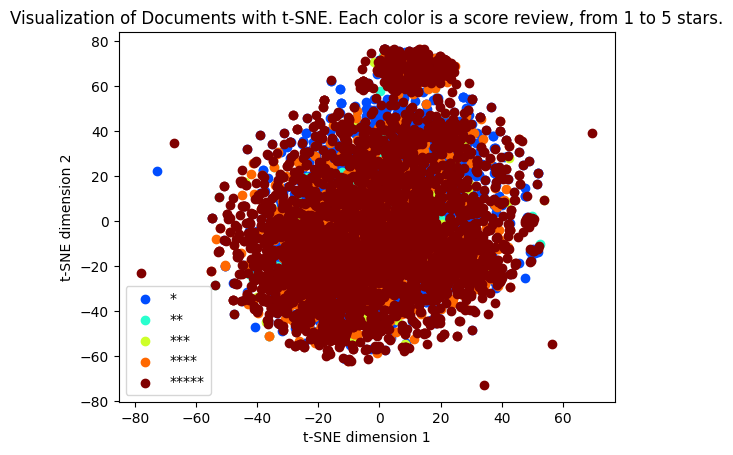

In [3]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

document_labels = df["note"].values[:5000]

# on initialise le t-SNE
tsne_model = TSNE(init="random", n_components=2, verbose=1, random_state=0)

# on applique la t-SNE transformation
tsne_embedding = tsne_model.fit_transform(tfidf_matrix[:5000])

# We reating a color palette with 6 distinct shades
colors = plt.cm.jet(np.linspace(0, 1, 6))  # 'jet' can be replaced with any colormap

# Visualization for understanding
for i in range(6):
    indices = document_labels == i
    plt.scatter(tsne_embedding[indices, 0], tsne_embedding[indices, 1], color=colors[i], label='*' * i)

plt.legend()
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.title('Visualization of Documents with t-SNE. Each color is a score review, from 1 to 5 stars.')
plt.show()

## Word2Vec

In [4]:
!pip install gensim


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [5]:
import gensim
from gensim.models import Word2Vec

# We repare the data for Word2Vec
sentences = df_cleaned['text'].apply(lambda x: x.split(' ')).values

# We training the Word2Vec model
model = Word2Vec(sentences, vector_size=256, window=5, min_count=1, sg=1)

# Example of how to use the model
word_vectors = model.wv
print(word_vectors.similar_by_word('mauvais'))

[('faite', 0.8243527412414551), ('apprendre', 0.8202271461486816), ('vue', 0.820162832736969), ('incompréhensible', 0.819408655166626), ('quasi', 0.8088821172714233), ('déception', 0.807542622089386), ('.....', 0.8068920373916626), ('valable', 0.8057442903518677), ('fiable', 0.805336058139801), ('complètement', 0.8047224879264832)]


Le modèle Word2Vec a retourné les mots similaires au terme "mauvais", ce qui reflète des termes généralement associés à des expériences négatives ou à des critiques. Parmi les mots les plus proches, on trouve :

"indisponible" et "incompréhensible" : Ces termes sont typiques des plaintes concernant l'indisponibilité d'un service ou le manque de clarté des informations.
"bug" et "engager" : Ces mots peuvent indiquer des problèmes techniques ou des difficultés dans le processus d'engagement avec le fournisseur.
"risquer" et "quasi" : Ils peuvent refléter des situations où les clients expriment des préoccupations quant aux risques ou à la qualité perçue du service.
Les scores de similarité, proches de 0,8, montrent une forte corrélation sémantique entre ces mots et "mauvais", ce qui confirme que ces termes sont souvent utilisés ensemble dans les avis pour exprimer des expériences négatives. Cela permet d'identifier les principaux problèmes rencontrés par les clients et donc ce qu'il faudrait améliorer.

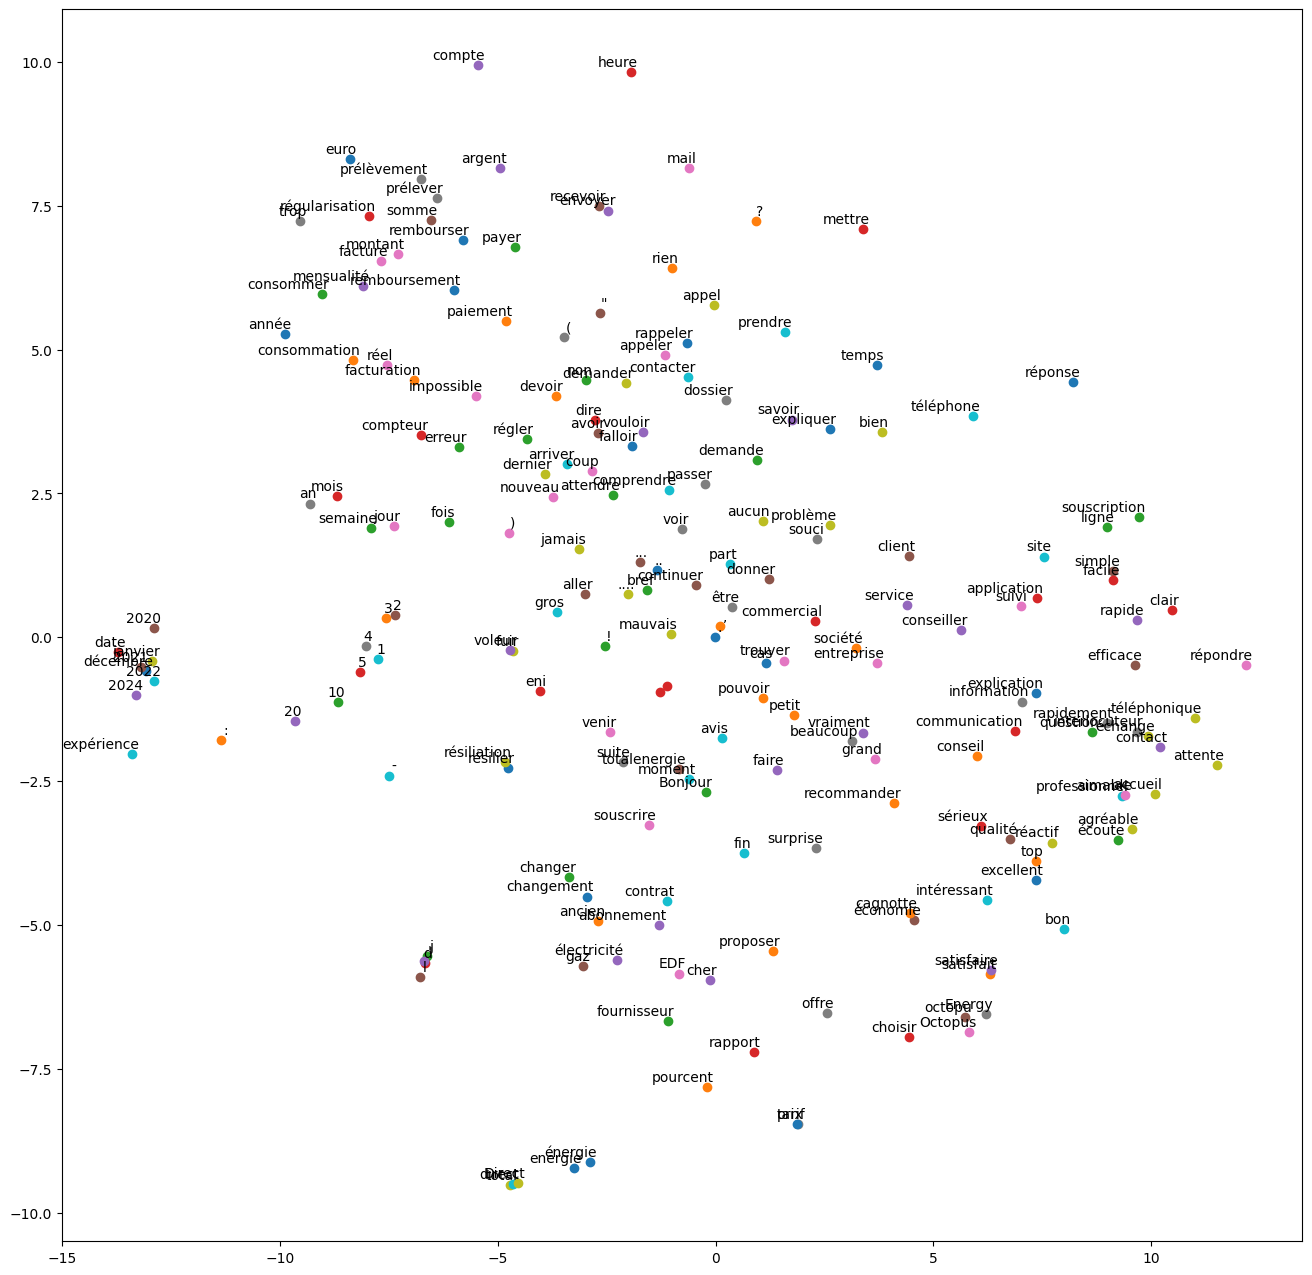

In [6]:
words = word_vectors.index_to_key[:200]  # get the list of the first 200 words
vectors = word_vectors.vectors[:200]  # get the vectors of the first 200 words

# We reduce dimensions with t-SNE
tsne = TSNE(n_components=2, random_state=0)
vectors_2d = tsne.fit_transform(vectors)

#  Visualize with Matplotlib
plt.figure(figsize=(16, 16))
for i, word in enumerate(words):
    plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1])
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.show()

Le graphique ci-dessus représente une projection en deux dimensions des vecteurs Word2Vec, visualisés à l'aide de l'algorithme t-SNE. Cette visualisation met en évidence les regroupements sémantiques entre différents mots extraits des avis clients.

Les mots liés à la satisfaction et à la qualité de service, tels que "bon", "agréable", "efficace", sont regroupés dans la partie supérieure.
Les termes associés à des problèmes ou critiques, comme "mauvais", "problème", "souci", "dossier", sont proches les uns des autres dans la partie centrale.
D'autres clusters montrent des regroupements liés à des aspects techniques ou commerciaux, par exemple "tarif", "énergie", "contrat", "EDF".
Cette organisation reflète les thématiques principales des avis : expérience client, facturation, communication et service après-vente. Elle permet d’identifier rapidement les domaines où les clients expriment soit des retours positifs, soit des insatisfactions.

In [7]:
#Cette fonction filtre les mots dans chaque phrase en ne conservant que ceux présents dans le vocabulaire du modèle Word2Vec.
def preprocess(sentence_tokenized, model):
    return [word for word in sentence_tokenized if word in list(model.wv.index_to_key)]

#Pour chaque phrase, la fonction calcule la moyenne des vecteurs des mots présents dans la phrase.
#Cela permet de représenter chaque phrase sous la forme d'un vecteur de dimension égale à celle des vecteurs du modèle Word2Vec.
def average_pooling(doc, model):
    words = preprocess(doc, model)
    if len(words) == 0:
       return np.zeros(model.vector_size)
    else:
       return np.mean(model.wv[words], axis=0)

vectors = [average_pooling(sentence, model) for sentence in sentences]
sentence_vector = pd.DataFrame(vectors)
sentence_vector

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-0.014260,-0.335424,0.062047,0.056230,0.251981,-0.166844,0.150193,-0.133758,-0.157642,0.105345,...,0.124345,0.131964,-0.261205,-0.080244,0.007008,0.052693,-0.147103,-0.082620,-0.348414,0.068799
1,0.011379,-0.224203,0.066153,0.129456,0.262694,-0.180765,0.178250,-0.093343,-0.160404,0.148402,...,0.152915,0.037530,-0.073333,0.042714,-0.071797,0.136025,-0.156162,-0.211129,-0.334970,0.020263
2,0.042212,-0.199220,0.086693,0.099962,0.180292,-0.098160,0.206030,-0.120857,-0.143297,0.046618,...,0.088074,0.044049,-0.179581,-0.089163,-0.105690,0.048908,-0.122510,-0.102290,-0.365519,0.068366
3,0.005233,-0.193544,0.070720,0.126818,0.140038,-0.164604,0.195199,-0.115128,-0.156433,0.106180,...,0.052011,0.078219,-0.150538,-0.127860,-0.052569,0.065550,-0.167617,-0.165661,-0.341088,0.036687
4,0.323676,-0.217312,0.008393,0.084710,0.534538,0.026699,0.105921,0.022873,-0.140497,-0.213740,...,0.387408,-0.068246,-0.292171,-0.070959,-0.294313,0.009241,0.038987,-0.208252,-0.455823,-0.106628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0.006216,-0.246216,0.067786,0.201168,0.144633,-0.158052,0.196679,-0.066174,-0.153758,0.088872,...,0.094859,0.058455,-0.190178,-0.121169,-0.082388,0.068422,-0.146669,-0.141833,-0.404624,0.079923
9995,0.051581,-0.469713,0.142583,0.065120,0.267152,-0.116359,0.112413,-0.067301,-0.181274,0.099147,...,0.067142,0.088528,-0.229418,-0.015190,-0.028070,0.095100,-0.144752,-0.075176,-0.289664,-0.009789
9996,-0.022037,-0.170609,0.092475,0.087167,0.153779,-0.114552,0.178232,-0.100261,-0.116397,0.079672,...,0.131741,0.124175,-0.104825,-0.210246,-0.059007,0.050429,-0.138857,-0.187843,-0.364176,0.121873
9997,-0.013713,-0.151128,0.033784,0.156278,0.189045,-0.106653,0.183188,-0.120311,-0.044724,0.109653,...,0.097796,0.077718,-0.143063,-0.086258,-0.017784,0.055960,-0.172990,-0.119584,-0.319869,-0.003158


Les vecteurs obtenus sont des représentations numériques qui capturent le sens sémantique des phrases. Les valeurs peuvent être positives ou négatives, reflétant les différentes dimensions d'association contextuelle.

In [8]:
def get_word_vector(word, model):
    """
    Renvoie le vecteur d'un mot donné s'il est présent dans le vocabulaire du modèle Word2Vec.

    Paramètres :
    - word (str) : Le mot dont on veut obtenir le vecteur.
    - model : Le modèle Word2Vec entraîné.

    Retourne :
    - np.array : Le vecteur du mot ou un vecteur nul si le mot n'est pas trouvé.
    """
    if word in model.wv:
        return model.wv[word]
    else:
        print(f"Le mot '{word}' n'est pas présent dans le vocabulaire.")
        return np.zeros(model.vector_size)

# Exemple d'utilisation :
word = "pertinent"
vector = get_word_vector(word, model)
print(f"Vecteur pour le mot '{word}':\n", vector)


Vecteur pour le mot 'pertinent':
 [ 0.01672832 -0.20502687  0.0368074   0.21417457  0.28481308 -0.10587264
  0.09135699 -0.06310714 -0.02290403  0.1873781  -0.00640025  0.01865826
  0.03262588  0.13503216  0.02614696  0.08525594  0.18835947 -0.01033124
 -0.34764692  0.3204342  -0.09671748  0.0068103  -0.04333792 -0.29330716
 -0.25442797  0.16203508  0.10438235 -0.0113483  -0.15814285 -0.10082927
  0.04258704  0.01297047  0.12619908 -0.12326621  0.0029155   0.32898164
  0.4019212  -0.09794452  0.0813825  -0.10963655 -0.35191792  0.08879986
  0.03369133 -0.231773   -0.01225203  0.02948483 -0.03254354 -0.03593014
  0.04824042 -0.00194372 -0.05628949  0.02866897  0.08213815  0.04083388
 -0.0320203  -0.185915    0.11150964 -0.08547838  0.18729807  0.0438871
  0.02939423  0.0594909   0.05419214 -0.02201088  0.17817615  0.01050359
  0.04109988  0.2775735  -0.1365574  -0.07430675 -0.05013014  0.07405762
 -0.204717   -0.12293833  0.0747777   0.00182057 -0.09678736 -0.21769886
 -0.03541948  0.08

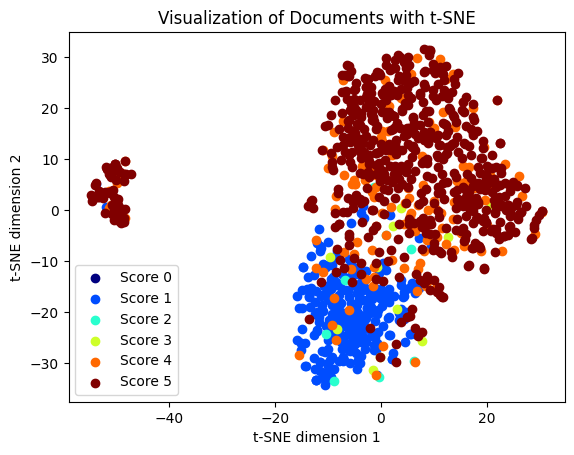

In [9]:
# Reduce dimensions with t-SNE
document_labels = document_labels[:1000]

tsne = TSNE(n_components=2, random_state=0)
tsne_embedding = tsne.fit_transform(sentence_vector[:1000])

# Creating a color palette with 6 distinct shades
colors = plt.cm.jet(np.linspace(0, 1, 6))  # 'jet' can be replaced with any colormap

# Visualization
for i in range(6):
    indices = document_labels == i
    plt.scatter(tsne_embedding[indices, 0], tsne_embedding[indices, 1], color=colors[i], label=f'Score {i}')

plt.legend()
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.title('Visualization of Documents with t-SNE')
plt.show()

Le graphique ci-dessus visualise la distribution des documents dans un espace de deux dimensions, réduit à l’aide de l’algorithme t-SNE. Chaque point représente un document (ou un avis client) et les couleurs indiquent les différentes catégories ou scores associés.

On remarque la formation de plusieurs groupes de documents, suggérant des similarités dans leur contenu sémantique.
Les documents de la catégorie Score 0 (points bleus foncés) forment un cluster bien défini, ce qui peut refléter des avis spécifiques ou un type de contenu récurrent.
Les documents des scores 3 et 5 (rouge foncé et orange) sont plus dispersés, mais se regroupent également, ce qui pourrait indiquer des similitudes modérées ou des thématiques légèrement variées.
Proximité des clusters :
Certains groupes, comme ceux des scores 1 (bleu clair) et 2 (vert), se chevauchent partiellement, ce qui peut signifier que leurs contenus sont proches en termes de thématique ou de sentiment.

## Création de Sentence Vectors

In [16]:

# On répare les données
sentences = df_cleaned['text'].apply(lambda x: x.split()).values

# On Forme le modèle Word2Vec
word2vec_model = Word2Vec(sentences, vector_size=256, window=5, min_count=1, sg=1)

# Nous calculons la matrice TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_cleaned['text'].values)
feature_names = vectorizer.get_feature_names_out()

# Puis on contruit le dictionnaire des poids TF-IDF
average_scores = np.mean(tfidf_matrix.toarray(), axis=0)
tfidf_weights = dict(zip(feature_names, average_scores))

# La fonction pour calculer les vecteurs pondérés des phrases
def weighted_sentence_vector(sentence, model, tfidf_weights):
    words = [word for word in sentence if word in model.wv and word in tfidf_weights]
    if not words:  # Si aucun mot n'est trouvé
        return np.zeros(model.vector_size)

    # Enfin on calcule la moyenne pondérée par les scores TF-IDF
    weighted_vectors = [model.wv[word] * tfidf_weights[word] for word in words]
    return np.mean(weighted_vectors, axis=0)

# On calcule les vecteurs pour toutes les phrases
weighted_vectors = [weighted_sentence_vector(sentence, word2vec_model, tfidf_weights) for sentence in sentences]

# Enfin on converti les vecteurs en DataFrame
sentence_vector_df = pd.DataFrame(weighted_vectors)

print("Vecteurs de phrases créés avec TF-IDF pondéré et Word2Vec :")
print(sentence_vector_df.head())


Vecteurs de phrases créés avec TF-IDF pondéré et Word2Vec :
        0         1         2         3         4         5         6    \
0  0.000525 -0.002094  0.000995  0.001835  0.000762 -0.000798  0.001372   
1  0.001861 -0.000793  0.001282  0.003114  0.000448 -0.001377  0.001404   
2  0.000577 -0.001273  0.001003  0.000727  0.001191 -0.000887  0.001087   
3  0.000513 -0.000757  0.000836  0.000758  0.000541 -0.000367  0.000777   
4  0.001013 -0.002951  0.005747  0.009004  0.003952 -0.003477  0.002072   

        7         8         9    ...       246       247       248       249  \
0  0.000188 -0.002533  0.000572  ... -0.000828  0.000283 -0.002800 -0.001390   
1  0.000039  0.000734  0.000802  ...  0.002313 -0.000808 -0.002901 -0.002389   
2  0.000001 -0.000511  0.001459  ...  0.000190  0.000260 -0.001732 -0.001048   
3 -0.000294 -0.000178  0.000593  ...  0.000394  0.000025 -0.000781 -0.000769   
4 -0.002919 -0.003736  0.005510  ...  0.003140  0.003118 -0.002190 -0.001025   

        

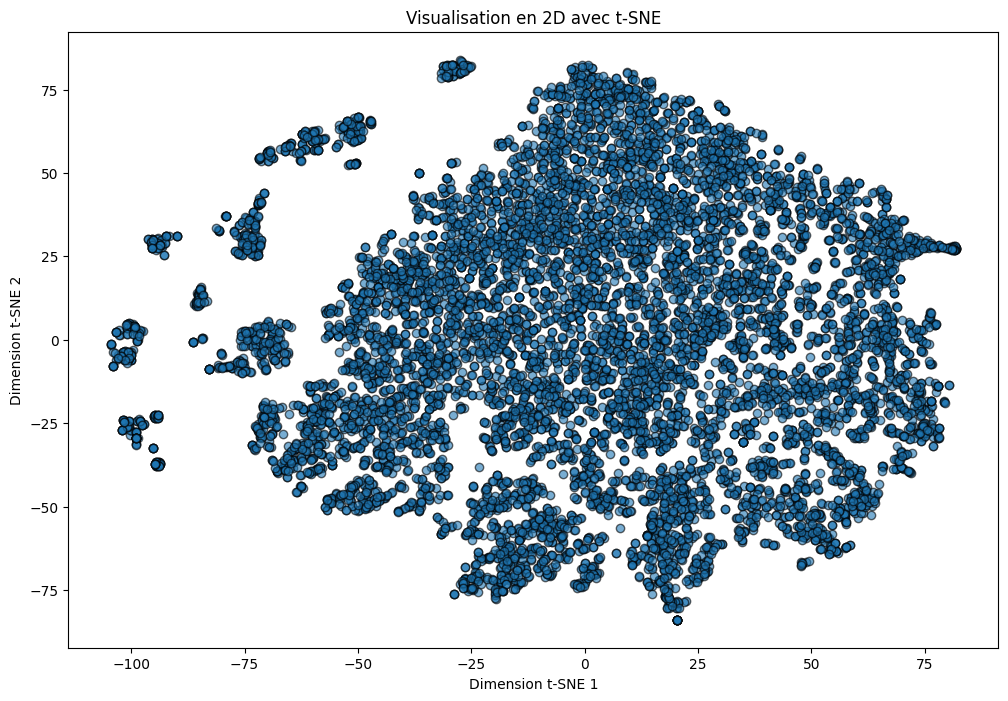

In [18]:


# Assurez-vous que vos données sont converties en array NumPy
weighted_vectors_array = np.array(weighted_vectors)  # weighted_vectors est votre liste de vecteurs

# Appliquez t-SNE avec des paramètres adaptés
tsne = TSNE(n_components=2, random_state=0, perplexity=30)
vectors_2d = tsne.fit_transform(weighted_vectors_array)

# Visualisation
plt.figure(figsize=(12, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], alpha=0.6, edgecolors='k')
plt.title("Visualisation en 2D avec t-SNE")
plt.xlabel("Dimension t-SNE 1")
plt.ylabel("Dimension t-SNE 2")
plt.show()
